<font size=7  color=#0f8ef1>Machine Learning assignment<br><br> 
    Topic : Tyre Inc. R&D </font> <br><br><br>

The Research & Development team of Tyre Inc. has been testing a number of new products for potential introduction to the market. For each tyre, a number of attributes have been collected about the tyre characteristics and the testing conditions, as well as the outcome of the test, i.e., success or failure. As member of the team in charge of data science you are in charge to create a machine learning task to predict the failure of a tyre and describe which attributes are the most relevant for outcome.
Dataset description The dataset contains a list of tested tyres. The target and attributes information are described below.

• Number of instances: 3000 • number of attributes: 15

• Target variable: “failure”:
 - 0: test was successful
 - 1: test ended with tyre failure
The task is formulated as a binary classification. Your grade will be based on the F1-score metric and on the modeling process presented in the report.

<font size=6 color=#0f8ef1> <center><b>PART I - Data importation and preparation </b></center> </font> <br> 

## Data importation

In [636]:
import pandas as pd
import numpy as np
df = pd.read_csv('tyres_train.csv')

In [637]:
df.head()

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0


## Target attribute

failure
0    1992
1    1008
dtype: int64


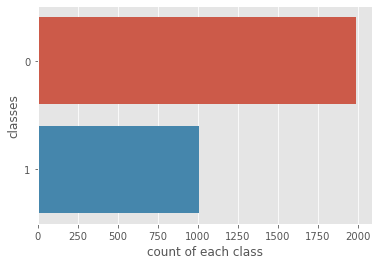

In [638]:
print(df.groupby('failure').size())

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

sns.countplot(y=df.failure ,data=df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

#### We can see that there are two times more "0" targets than "1" targets.  
#### We may try to apply oversampling to the "1" class

   ## Check duplicate value

In [639]:
df[df.duplicated()]

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure


No duplicate value found

## Missing Value

In [640]:
df.isna()['diameter']

0       False
1        True
2        True
3       False
4       False
        ...  
2995     True
2996     True
2997     True
2998    False
2999    False
Name: diameter, Length: 3000, dtype: bool

In [641]:
df_drop=df.dropna(axis=1)
print(len(df), len(df_drop))

3000 3000


In [642]:
df_drop = df_drop.drop(['failure'],axis=1)

We have to check if 'diameter' is an important componant or we drop the column

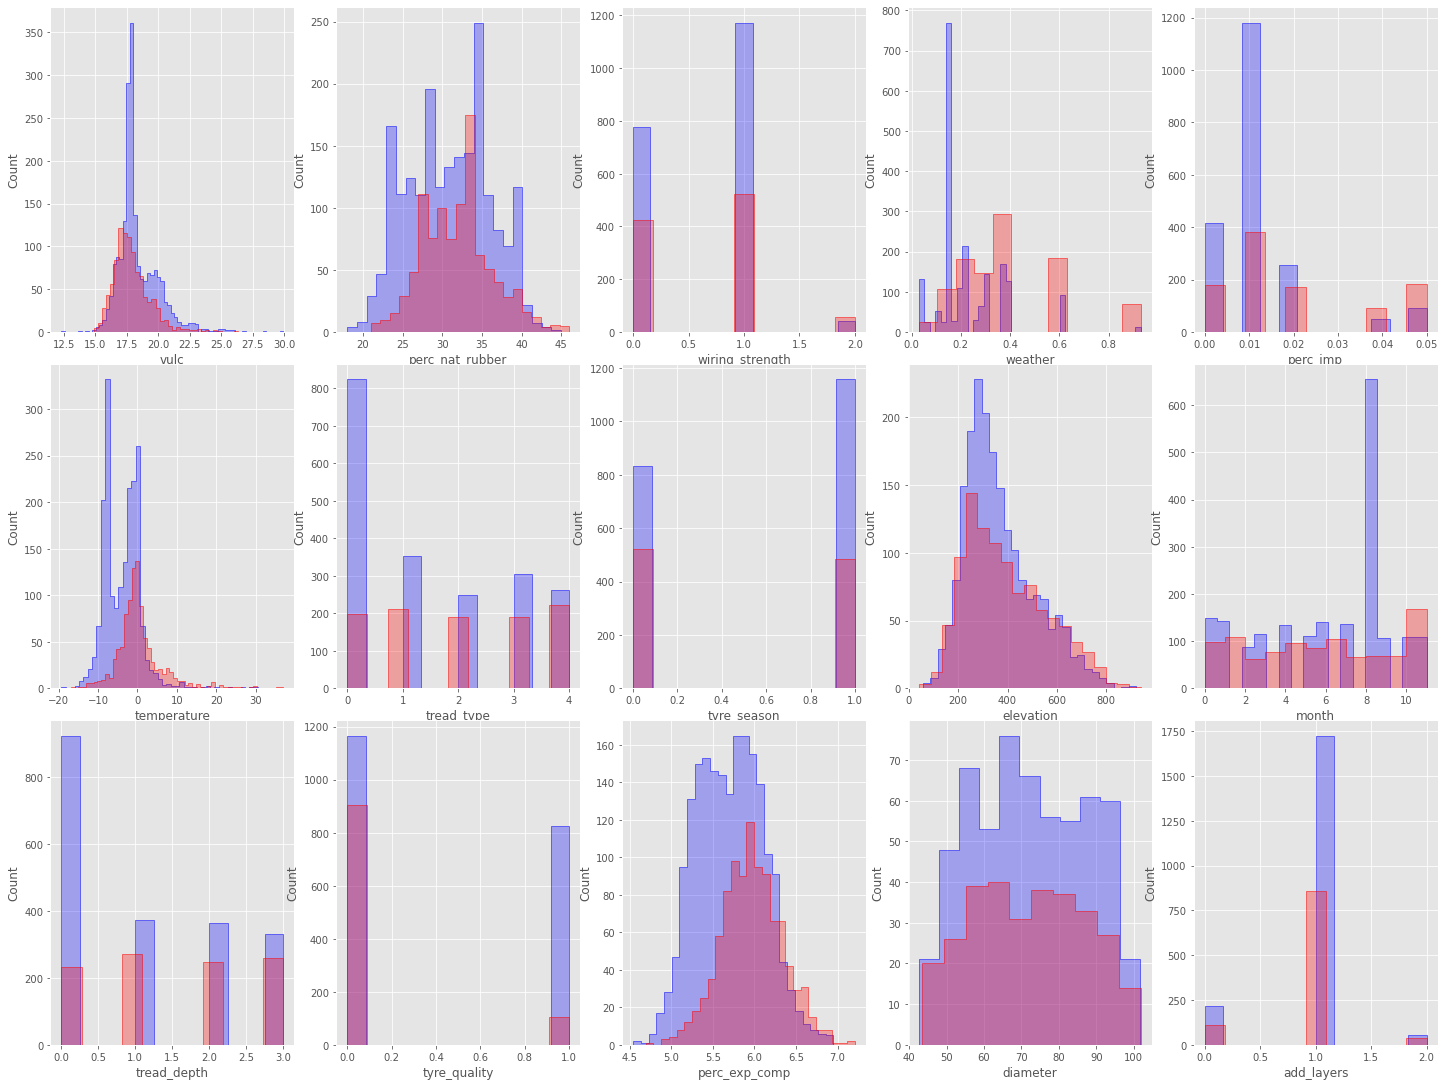

In [643]:
# Checking the univariate 

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

X=df

X0 = X[X['failure']==0]
X1 = X[X['failure']==1]

fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(20,15))
fig.tight_layout()

for i, ax in zip(range(X.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", element="step", ax=ax,  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", element="step", ax=ax,  alpha=0.3)
plt.show()

## Oversampling

failure
0    1992
1    2000
dtype: int64


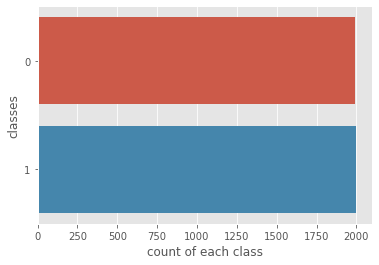

In [644]:
#Print class freq. through pandas 
print(df_oversampled.groupby('failure').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df_oversampled.failure ,data=df_oversampled)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

### Oversampling wi

## Scaling Data

<AxesSubplot:>

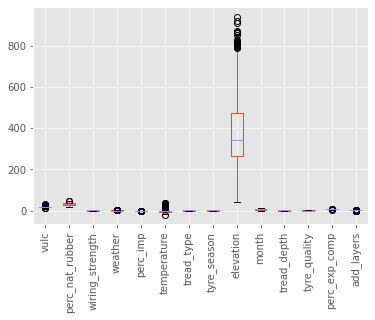

In [645]:
%matplotlib inline
df_drop.boxplot(rot=90)

#### Separation of Categorical and Numerical 

In [646]:
df_categorical = df_drop[['month','wiring_strength','tread_type','tyre_season','tread_depth','tyre_quality','add_layers']]
df_drop_notint = df_drop.drop(['month','wiring_strength','tread_type','tyre_season','tread_depth','tyre_quality','add_layers'],axis=1)

In [647]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first = True) 
dummies

,month_1,month_10,month_11,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,tread_type_2,tread_type_3,tread_type_4,tyre_season_1,tread_depth_1,tread_depth_2,tread_depth_3,tyre_quality_1,add_layers_1,add_layers_2
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
2996,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2997,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
2998,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [648]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_drop_notint) 
print(scaler)

StandardScaler()


In [649]:
scaled_data = scaler.transform(df_drop_notint)
#The scaler instance can then be used on new data (e.g.TEST SET!)

In [650]:
scaled_df = pd.DataFrame(scaled_data)
scaled_df.columns = df_drop_notint.columns

scaled_df

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
0,-0.122697,-1.064306,-0.671245,-0.319087,-1.012943,-0.289059,-1.612448
1,1.587525,0.963073,0.092857,-0.319087,-0.378161,-0.318836,0.873829
2,0.612055,0.557597,0.092857,-0.319087,0.228409,-0.854817,1.385710
3,-0.871314,0.760335,-0.507509,0.382204,1.730726,0.210528,2.019467
4,-0.658323,-1.672520,0.584065,-0.319087,5.800384,-0.451177,0.873829
...,...,...,...,...,...,...,...
2995,-0.231083,-0.456093,0.584065,-0.319087,1.702514,-0.586827,-0.271809
2996,-0.698653,-0.253355,-0.343773,-1.020379,0.164930,-1.480129,0.045070
2997,-1.269567,0.354859,0.584065,-0.319087,-0.187726,-0.934222,-0.539937
2998,0.433093,1.165810,-1.380768,-1.020379,0.284834,-0.570284,0.240072


<AxesSubplot:>

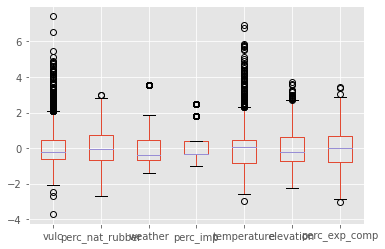

In [29]:
scaled_df.boxplot()

#### Concatenation of Dummies and Scaled numerical data

In [30]:
df_final = pd.concat([scaled_df,dummies], axis = 1)
df_final.head()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,month_1,month_10,month_11,...,tread_type_2,tread_type_3,tread_type_4,tyre_season_1,tread_depth_1,tread_depth_2,tread_depth_3,tyre_quality_1,add_layers_1,add_layers_2
0,-0.122697,-1.064306,-0.671245,-0.319087,-1.012943,-0.289059,-1.612448,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,1.587525,0.963073,0.092857,-0.319087,-0.378161,-0.318836,0.873829,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0.612055,0.557597,0.092857,-0.319087,0.228409,-0.854817,1.385710,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,-0.871314,0.760335,-0.507509,0.382204,1.730726,0.210528,2.019467,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,-0.658323,-1.672520,0.584065,-0.319087,5.800384,-0.451177,0.873829,0,0,0,...,0,0,0,1,0,1,0,0,1,0


<br><br><br><br><br><br><font size=6 color=#0f8ef1> <center><b>PART II - Exploratory Data Analysis </b></center> </font> <br> 

## Data correlations

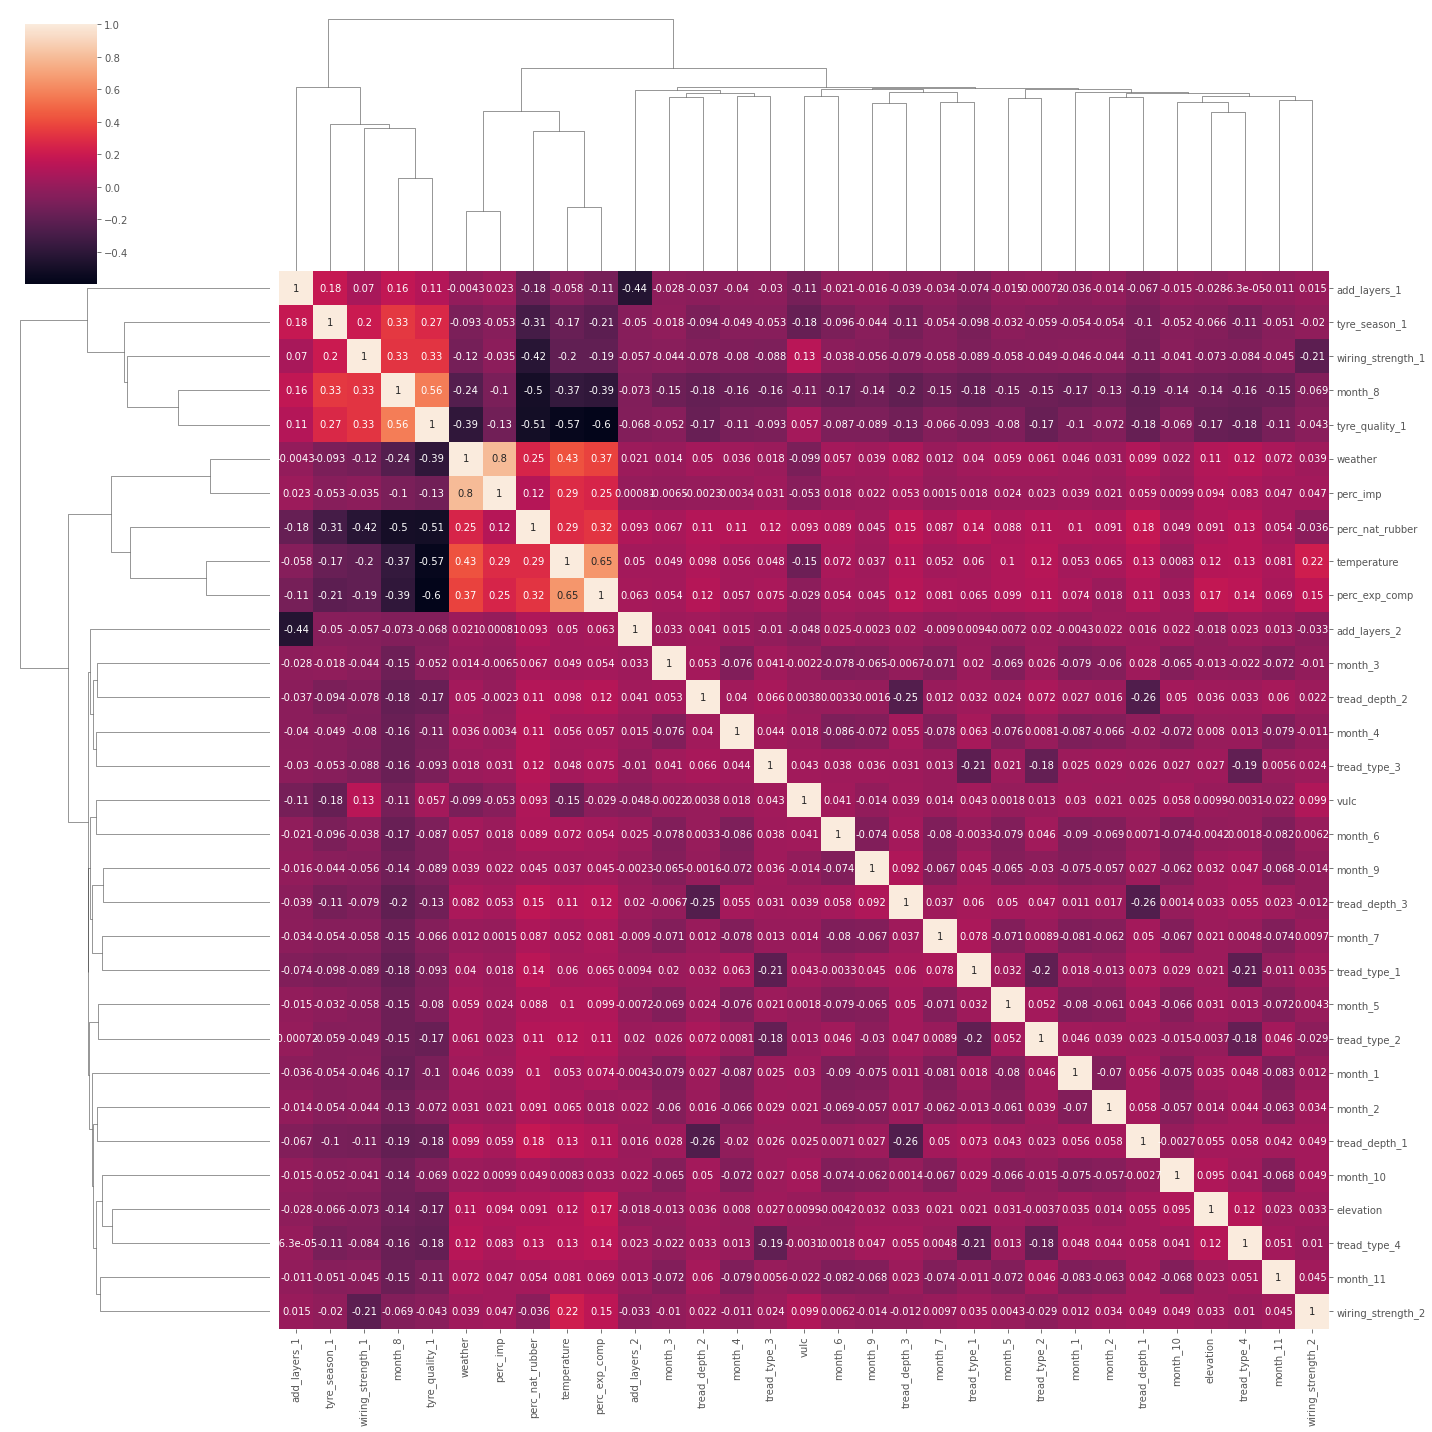

In [55]:
df_corr = pd.DataFrame(df_final).corr()
sns.clustermap(df_corr, annot=True, square=True,figsize=(20, 20))
plt.show();

We observe that only "weather" and "perc_imp" are really correlated: 80%. But we don't have strong enough correlations to remove attributes. 

# PCA

In [31]:
from sklearn.decomposition import PCA

pca2 = PCA()
pca2.fit(df_final) 

PCA()

In [32]:
df_pca = pd.DataFrame(pca2.transform(df_final), columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31'],index=df_final.index.values)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,-2.367327,1.075602,0.131972,0.207519,-0.086841,0.348241,0.325808,0.000306,0.079918,0.064036,...,-0.002596,-0.001404,0.000452,-0.023341,0.034951,-0.005722,0.042249,0.009926,0.005068,-0.003327
1,0.421068,-1.400476,1.288514,-0.639677,0.384436,-0.560984,0.127976,0.417900,-0.663759,-0.266712,...,0.425928,0.000637,-0.014029,0.025758,0.033105,-0.074173,-0.091872,0.009212,0.037404,-0.037702
2,0.738916,-0.943740,0.126433,-1.056201,0.708598,-0.664350,0.038168,0.632042,-0.518511,-0.173110,...,-0.011840,0.023143,0.005126,0.077417,-0.056102,-0.024540,0.398761,-0.027456,0.023170,0.269457
3,1.877263,-0.804062,-1.412064,-0.103005,0.652372,-0.322922,0.232010,0.543276,1.525406,0.198309,...,0.704482,-0.021980,0.006445,0.146899,-0.073332,-0.067732,-0.055548,-0.080997,0.018250,-0.014703
4,2.761503,0.132660,-2.988528,-0.574096,3.152626,3.397490,-0.073464,-0.670510,-0.149751,0.600446,...,0.065520,0.036988,0.054493,0.328830,-0.383234,0.823904,0.423696,0.448166,0.011235,-0.027870


In [33]:
explained_var=pd.DataFrame(pca2.explained_variance_ratio_).transpose()
explained_var

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.28664,0.131576,0.108595,0.097983,0.07733,0.034329,0.023356,0.021767,0.021122,0.020119,...,0.006767,0.006622,0.006059,0.005934,0.005404,0.005201,0.003651,0.002653,0.002232,0.00069


In [34]:
Y = [np.sum(explained_var.to_numpy()[0][0:i]) for i in range(len(explained_var.to_numpy()[0]))]
X = np.linspace(0,len(explained_var.to_numpy()[0]),len(explained_var.to_numpy()[0]))

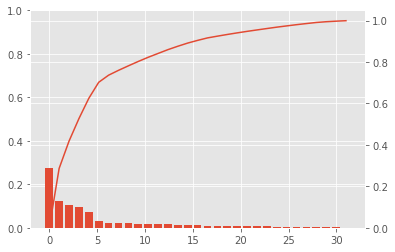

In [35]:
%matplotlib inline
import seaborn as sns

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1 = plt.bar(X,explained_var.to_numpy()[0])
ax2.plot(X,Y)

plt.show()



In [38]:
id_pca_max = 1
pca_sum = explained_var.to_numpy()[0][0]
i = 1

while pca_sum<0.9:
    pca_sum += explained_var.to_numpy()[0][id_pca_max]
    id_pca_max+=1

id_pca_max -= 1

print("we only have to keep the ",id_pca_max,"first pca components to get 90% of the Variance")
    

we only have to keep the  14 first pca components to get 90% of the Variance


In [39]:
pca2_new = PCA(n_components=14)
pca2_new.fit(df_final)
df_pca2_new = pd.DataFrame(pca2_new.components_, columns = df_final.columns, index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
df_pca2_new

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,month_1,month_10,month_11,...,tread_type_2,tread_type_3,tread_type_4,tyre_season_1,tread_depth_1,tread_depth_2,tread_depth_3,tyre_quality_1,add_layers_1,add_layers_2
PC1,-0.063478,0.319005,0.472186,0.394144,0.461058,0.155412,0.452534,0.015732,0.006605,0.015534,...,0.027200,0.018908,0.041657,-0.077891,0.042631,0.028899,0.036690,-0.185377,-0.020345,0.006914
PC2,-0.363636,-0.469328,0.408590,0.531367,-0.125969,-0.160867,-0.252814,-0.017600,-0.014202,-0.003862,...,-0.027455,-0.032420,-0.020849,0.141693,-0.039150,-0.040723,-0.036517,0.143920,0.063896,-0.008839
PC3,0.791995,0.162007,0.235911,0.342434,-0.329525,0.048434,-0.214475,0.009359,0.013421,-0.004592,...,-0.007210,0.014170,0.002372,-0.076725,0.012433,-0.012231,0.014120,0.066426,-0.026520,-0.007560
PC4,-0.048848,-0.226486,-0.039296,0.014284,-0.082668,0.963966,-0.025714,-0.001408,0.018639,-0.001433,...,-0.022533,-0.006835,0.026928,0.036850,-0.006312,-0.005834,-0.013466,0.031254,0.015629,-0.009238
PC5,0.437397,-0.653118,-0.094546,-0.043461,0.354188,-0.107291,0.419758,-0.010679,-0.004060,-0.003192,...,0.004399,-0.018023,-0.013936,0.030015,-0.036102,-0.006313,-0.011557,0.025234,0.011596,-0.011842
PC6,0.119688,0.002399,0.025212,-0.071714,0.697024,0.051954,-0.691799,-0.007898,-0.003633,0.008104,...,0.018432,-0.024432,-0.003778,-0.008723,0.074948,-0.030535,-0.011070,0.001909,0.026739,-0.009691
PC7,0.056543,0.333836,-0.075520,0.028987,0.091317,0.028477,0.084908,-0.015044,-0.034358,-0.040616,...,0.023272,0.006909,-0.073040,0.775232,-0.004275,-0.148517,-0.054260,0.123403,0.111260,-0.022148
PC8,-0.024856,-0.005003,-0.230367,0.195697,0.009448,-0.009815,0.074447,0.012003,-0.022951,-0.020288,...,-0.118319,-0.048981,-0.004122,-0.115238,0.664352,-0.604931,-0.081748,0.123720,-0.053218,0.002269
PC9,-0.040510,0.089213,-0.370133,0.325744,0.113071,0.011460,0.009002,-0.024557,-0.015615,-0.029928,...,-0.045108,0.052413,-0.044568,-0.155001,-0.452449,-0.234266,0.620121,0.224848,-0.011475,0.002395
PC10,-0.008674,0.077369,-0.446594,0.415574,0.110108,0.001221,0.024107,0.007861,0.004254,-0.006195,...,-0.032576,0.242334,-0.105417,-0.092607,-0.002451,0.435969,-0.490059,0.210912,-0.017635,0.005628


In [40]:
coord_pca = pd.DataFrame(pca2_new.transform(df_final),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'],index=df_final.index)
coord_pca.head(400)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-2.367327,1.075602,0.131972,0.207519,-0.086841,0.348243,0.325779,0.000228,0.079818,0.063977,0.081269,-0.061241,0.094919,-0.006054
1,0.421068,-1.400476,1.288513,-0.639677,0.384437,-0.560916,0.127770,0.418272,-0.663674,-0.267436,0.377979,-0.612997,-0.157985,0.844433
2,0.738916,-0.943740,0.126433,-1.056201,0.708597,-0.664348,0.038185,0.632254,-0.518244,-0.173101,0.439150,-0.442892,-0.183472,-0.017386
3,1.877263,-0.804062,-1.412064,-0.103005,0.652372,-0.322906,0.231821,0.543345,1.526166,0.197912,1.077551,0.402986,-0.023523,-0.127890
4,2.761503,0.132660,-2.988528,-0.574095,3.152625,3.397444,-0.073019,-0.669994,-0.148998,0.601402,-0.699460,0.594498,0.331599,-0.138937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.719365,-0.774884,-0.115967,-0.685065,0.373975,0.421076,-0.021902,-0.308975,0.572215,-0.617893,0.353007,-0.515041,-0.241867,0.764865
396,1.407164,-0.389725,-0.927558,1.628663,0.452987,-0.741487,-0.321028,0.533015,-0.738177,-0.504070,0.390806,-0.779985,0.190918,-0.379673
397,0.686719,-1.073372,0.548502,-0.760482,1.383248,-0.602028,-0.028862,-0.053808,-0.132172,-0.167479,0.301569,-0.253245,-0.096955,-0.034066
398,-1.204687,-1.295621,1.942183,1.156410,-1.702653,0.319089,0.951097,-0.139731,0.227597,0.396454,0.142328,-0.271678,-0.748661,-0.355397


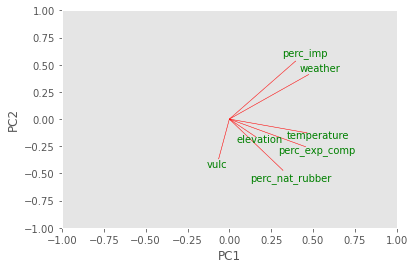

<Figure size 1600x3200 with 0 Axes>

In [41]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca2_new.transform(df_final)[:,0:2],np.transpose(pca2_new.components_[0:2, :7]), df_final.columns)
plt.figure(figsize = (20,40), dpi=80)
plt.show()

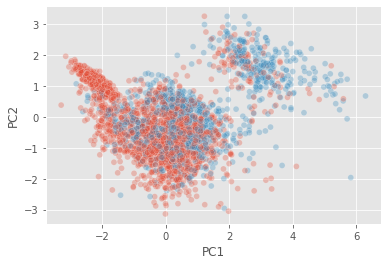

In [47]:
p1=sns.scatterplot(x="PC1", y="PC2",
                   hue=df['failure'],
                   alpha=.3, 
                   legend=False,
                   data=coord_pca);


We can use the first 14 components of the PCA for the classification. It would reduce the computing time and we would keep the variance of the dataset. 

<br><br><br><br><br><br><font size=6 color=#0f8ef1> <center><b>PART III - Classification </b></center> </font> <br> 

## Split Data

In [561]:
y=df['failure']

X = df_final


In [562]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, 
                                                    stratify=y, 
                                                    random_state=9) 

print(X_train.shape, X_test.shape)

(2100, 31) (900, 31)


#### We remove outliers 

In [563]:

from sklearn.neighbors import LocalOutlierFactor

j=0
indices= []
clf = LocalOutlierFactor(n_neighbors=30,leaf_size=50, contamination=0.1)
y_pred_out = clf.fit_predict(X_train.iloc[:,:-1])


X_train = X_train.iloc[y_pred_out == 1,:]
y_train = y_train.iloc[y_pred_out == 1]


## Models

In [564]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.feature_selection import SelectKBest

In [565]:
def hyperp_search(classifier, parameters,scoring,name_classifier):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = scoring, verbose=1, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    
    F1_result["F1_train"][name_classifier] = f1_score(y_train, y_pred_train)
    F1_result["F1_test"][name_classifier] = f1_score(y_test, y_pred)
    
    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))

## KNN

In [566]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,500,20)}
hyperp_search(classifier,parameters,'f1',"KNN")

Fitting 3 folds for each of 25 candidates, totalling 75 fits
f1_train: 0.543178 using {'n_neighbors': 30}
f1         train 0.588   test 0.530
precision  train 0.733   test 0.665

[[531  67]
 [169 133]]


## TREE

In [567]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': np.arange(1,18),
              ''
              'min_samples_split': np.arange(8,16),
              'min_samples_leaf': [5,10,20]}

hyperp_search(classifier,parameters,'f1',"TREE")

Fitting 3 folds for each of 816 candidates, totalling 2448 fits
f1_train: 0.581907 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 8}
f1         train 0.737   test 0.501
precision  train 0.793   test 0.554

[[487 111]
 [164 138]]


## SVC

In [568]:
#SVC

from sklearn.svm import SVC
classifier = SVC()
parameters = {"kernel":['linear','rbf','polinomial','sigmoid'],
              "C":[0.1,0.2],
              "gamma":['scale'],
              "degree":[2,4],
              "tol": [1e-3]}


hyperp_search(classifier,parameters,'f1',"SVC")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/Users/fabrice/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fabrice/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fabrice/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/fabrice/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 315, in _dense_f

f1_train: 0.602386 using {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid', 'tol': 0.001}
f1         train 0.588   test 0.554
precision  train 0.598   test 0.572

[[477 121]
 [140 162]]


## LogisticRegression

In [569]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
parameters = {"C":np.arange(1,100)/100,
              "penalty":['l1','l2'], 
              "solver":['lbfgs', 'liblinear']}


hyperp_search(classifier,parameters,'f1',"LogisticRegression")

Fitting 3 folds for each of 396 candidates, totalling 1188 fits
f1_train: 0.603133 using {'C': 0.57, 'penalty': 'l2', 'solver': 'liblinear'}
f1         train 0.611   test 0.565
precision  train 0.690   test 0.637

[[511  87]
 [149 153]]


/Users/fabrice/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
297 fits failed out of a total of 1188.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
297 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fabrice/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fabrice/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/fabrice/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logisti

## GaussianNB

In [570]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
parameters = {}


hyperp_search(classifier,parameters,'f1',"GaussianNB")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
f1_train: 0.583854 using {}
f1         train 0.609   test 0.559
precision  train 0.533   test 0.484

[[385 213]
 [102 200]]


## MLPClassifier

In [571]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(8,4,2),(2),(4,2)],
              "max_iter": [5000000],
              "solver":['adam'],
              "activation":['relu'],
              "alpha":np.arange(1,10)/10}


hyperp_search(classifier,parameters,'f1',"MLPClassifier")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
f1_train: 0.627831 using {'activation': 'relu', 'alpha': 0.5, 'hidden_layer_sizes': (4, 2), 'max_iter': 5000000, 'solver': 'adam'}
f1         train 0.662   test 0.569
precision  train 0.722   test 0.634

[[508  90]
 [146 156]]


In [606]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(8,4,2),(2),(4,2)],
              "max_iter": [5000000],
              "solver":['adam'],
              "activation":['relu'],
              "alpha":np.arange(1,10)/10}


hyperp_search(classifier,parameters,'f1',"MLPClassifier")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Users/fabrice/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
81 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fabrice/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fabrice/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/fabrice/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_per

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## RandomForestClassifier

In [572]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
parameters = {'n_estimators' : [50,100],
              'criterion' : ['entropy', 'gini'],
              'max_depth' : [5], 
              'min_samples_split' : [4,5,10,20],
              'min_samples_leaf' : [4,5,10,20]
             }


hyperp_search(classifier,parameters,'f1_micro',"RandomForestClassifier")

Fitting 3 folds for each of 64 candidates, totalling 192 fits
f1_train: 0.759259 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}
f1         train 0.608   test 0.505
precision  train 0.794   test 0.665

[[536  62]
 [179 123]]


# Showing the result 

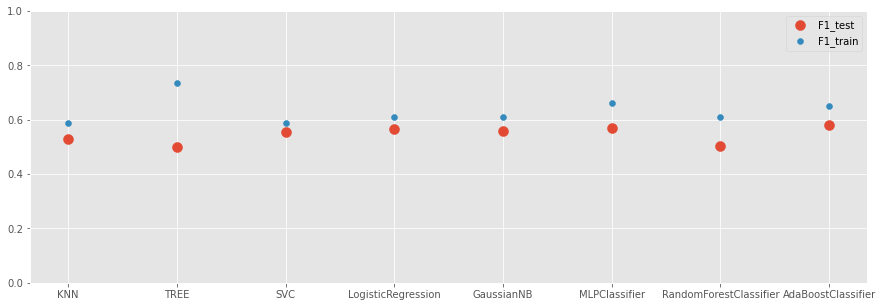

In [573]:

plt.figure(figsize=(15,5)) 
plt.scatter(F1_result.index.to_numpy(),F1_result["F1_test"].to_numpy(),label="F1_test",s=100)
plt.scatter(F1_result.index.to_numpy(),F1_result["F1_train"].to_numpy(),label="F1_train")
plt.ylim(0,1)
plt.legend()

plt.show()

<br><br><br><br><br><br><font size=4 color=#0f8ef1> <b>MLP Classifier and Logistic Regressions seem to be the best one. There is less than 5% of Overfitting between the training and the test set for both of them.<br>We also see that the f1 score is not this good, we can't reach more than 60%. </b></center> </font> <br> <br> <br> <br> <br> 

<br><br><br><br><br><br><font size=6 color=#0f8ef1> <center><b>PART IV - Final Test </b></center> </font> <br> 

### Importation of test set

In [608]:
df_test = pd.read_csv('tyres_test.csv')

In [609]:
df_test.head()

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers
0,17.180,30,1,0.21,0.00,-9.24,0,1,460.5,4,3,0,5.54,74,1
1,17.744,24,1,0.16,0.01,-9.12,0,1,278.5,8,0,1,5.01,79,1
2,16.930,34,0,0.27,0.01,3.64,2,0,733.5,11,2,0,6.41,94,1
3,22.428,34,1,0.03,0.00,0.56,3,0,235.5,9,3,0,5.95,93,1
4,16.818,29,1,0.06,0.00,-0.96,3,0,461.0,9,0,1,5.97,88,1


## removing Diameters attribut and preprocessing the data

In [610]:
df_test_drop=df_test.drop("diameter",axis=1)

In [611]:
df_test_categorical = df_test_drop[['month','wiring_strength','tread_type','tyre_season','tread_depth','tyre_quality','add_layers']]
df_test_drop_notint = df_test_drop.drop(['month','wiring_strength','tread_type','tyre_season','tread_depth','tyre_quality','add_layers'],axis=1)

In [612]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_test_drop_notint) 
print(scaler)

StandardScaler()


In [613]:
scaled_data_test = scaler.transform(df_test_drop_notint)


In [614]:
scaled_df_test = pd.DataFrame(scaled_data_test)
scaled_df_test.columns = df_test_drop_notint.columns
scaled_df_test


,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
0,-0.634840,-0.260750,-0.362551,-0.997348,-1.208878,0.533134,-0.602774
1,-0.291184,-1.462495,-0.631797,-0.298364,-1.187650,-0.684311,-1.888651
2,-0.787170,0.540414,-0.039456,-0.298364,1.069578,2.359303,1.508004
3,2.562869,0.540414,-1.331836,-0.997348,0.524730,-0.971950,0.391960
4,-0.855414,-0.461040,-1.170289,-0.997348,0.255844,0.536479,0.440484
...,...,...,...,...,...,...,...
7979,1.120000,-0.060459,0.068242,-0.298364,0.496426,-0.129103,0.246389
7980,-0.307026,-2.063368,-0.631797,-0.298364,-1.109814,0.191982,-0.554251
7981,-0.191256,-1.662786,-0.631797,-0.298364,-0.798473,-0.767927,-1.427676
7982,-0.186381,-0.661331,-0.631797,-0.298364,-0.975371,-0.533803,-0.069014


In [615]:
dummies = pd.get_dummies(df_test_categorical.astype(str),drop_first = True) 


In [616]:
df_test_final = pd.concat([scaled_df_test,dummies_test], axis = 1)
df_test_final

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,month_1,month_10,month_11,...,tread_type_2,tread_type_3,tread_type_4,tyre_season_1,tread_depth_1,tread_depth_2,tread_depth_3,tyre_quality_1,add_layers_1,add_layers_2
0,-0.634840,-0.260750,-0.362551,-0.997348,-1.208878,0.533134,-0.602774,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,-0.291184,-1.462495,-0.631797,-0.298364,-1.187650,-0.684311,-1.888651,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,-0.787170,0.540414,-0.039456,-0.298364,1.069578,2.359303,1.508004,0,0,1,...,1,0,0,0,0,1,0,0,1,0
3,2.562869,0.540414,-1.331836,-0.997348,0.524730,-0.971950,0.391960,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,-0.855414,-0.461040,-1.170289,-0.997348,0.255844,0.536479,0.440484,0,0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,1.120000,-0.060459,0.068242,-0.298364,0.496426,-0.129103,0.246389,0,0,0,...,0,0,1,1,0,1,0,1,1,0
7980,-0.307026,-2.063368,-0.631797,-0.298364,-1.109814,0.191982,-0.554251,0,0,0,...,0,0,0,1,0,0,0,1,1,0
7981,-0.191256,-1.662786,-0.631797,-0.298364,-0.798473,-0.767927,-1.427676,0,0,0,...,0,0,0,1,0,0,0,1,1,0
7982,-0.186381,-0.661331,-0.631797,-0.298364,-0.975371,-0.533803,-0.069014,0,0,0,...,0,0,0,1,0,0,0,1,1,0


## Creating the two models MLP and Logistic Regression

In [620]:
y_final=df['failure']

X_final = df_final

In [621]:
#removing the outliers

from sklearn.neighbors import LocalOutlierFactor

j=0
indices= []
clf = LocalOutlierFactor(n_neighbors=30,leaf_size=50, contamination=0.1)
y_pred_out = clf.fit_predict(X_final.iloc[:,:-1])


X_final = X_final.iloc[y_pred_out == 1,:]
y_final = y_final.iloc[y_pred_out == 1]


In [622]:
classifier_final_MLP = MLPClassifier(hidden_layer_sizes = (8,4,2),
              max_iter = 5000000,
              solver = 'adam',
              activation = 'relu',
              alpha = 0.7 ) 

classifier_final_MLP.fit(X_final, y_final)

classifier_final_Log = LogisticRegression(C = 0.17,
                                          penalty =  'l2', 
                                          solver = 'liblinear')
classifier_final_Log.fit(X_final, y_final)

LogisticRegression(C=0.17, solver='liblinear')

## Test set on the two models

In [623]:
x_test = df_test_final

In [624]:
y_test_pred_MLP = classifier_final_MLP.predict(x_test)
y_test_pred_Log = classifier_final_Log.predict(x_test)


df_test_pred = pd.DataFrame(columns = ["failure_MLP", "failure_log"])

df_test_pred["failure_MLP"] = y_test_pred_MLP
df_test_pred["failure_Log"] = y_test_pred_Log



In [625]:
df_test_final_pred = pd.concat([df_test_final,df_test_pred], axis = 1)

In [626]:
#Print class freq. through pandas 
print(df_test_final_pred.groupby('failure_MLP').size())
print(df_test_final_pred.groupby('failure_Log').size())

failure_MLP
0    5801
1    2183
dtype: int64
failure_Log
0    6060
1    1924
dtype: int64


In [635]:
prediction_mlp = df_test_final_pred['failure_MLP'].to_numpy()
np.savetxt('prediction_mlp.txt', prediction_mlp, delimiter=',', fmt='%i')

prediction_log = df_test_final_pred['failure_Log'].to_numpy()
np.savetxt('prediction_log.txt', prediction_log, delimiter=',', fmt='%i')

<br><br><br><br><br><br><font size=4 color=#0f8ef1> <b>In conclusion, we see that we have approximately the same amount of failure for both classifier.<br> But with the results of the f1_score, thoses predictions will not be all right for sure.<br><br> Oversampling would not imrpove the results but create bias. Removing attributes or index to simplify the complexity is not this important because of the low number of information </b></center> </font> <br> <br> <br> <br> <br> 